In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import statsmodels.api as sm

### Predict total travel time

In [2]:
df = pd.DataFrame({
       "kilometers_traveled" : [89,66,78,111,44,77,80,66,109,76], 
       "num_deliveries" : [4,1,3,6,1,3,3,2,5,3],
       "travel_time" : [7,5.4,6.6,7.4,4.8,6.4,7,5.6,7.3,6.4],
       "gas_price" : [3.84,3.19,3.78,3.89,3.57,3.57,3.03,3.51,3.54,3.25]
})

In [3]:
df.head()

,kilometers_traveled,num_deliveries,travel_time,gas_price
0,89,4,7.0,3.84
1,66,1,5.4,3.19
2,78,3,6.6,3.78
3,111,6,7.4,3.89
4,44,1,4.8,3.57


In [4]:
cols = [i for i in df.columns]
cols

['kilometers_traveled', 'num_deliveries', 'travel_time', 'gas_price']

/Users/Dominance/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


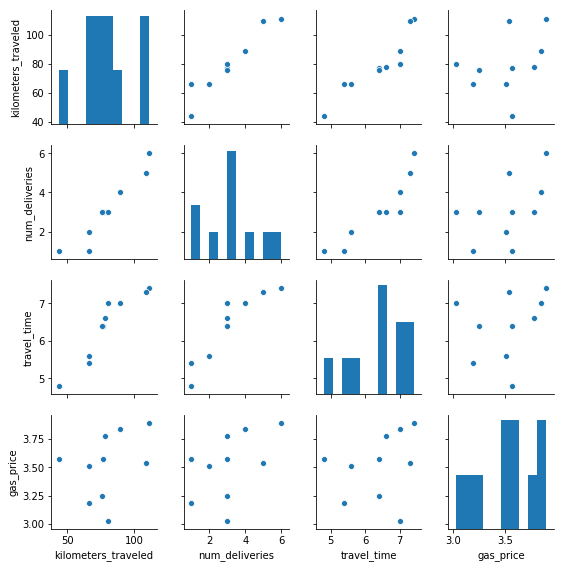

In [5]:
sns.pairplot(df[cols], size=2, x_vars=cols, y_vars=cols)
plt.show()

In [6]:
corr = df.corr(method="pearson")
corr

,kilometers_traveled,num_deliveries,travel_time,gas_price
kilometers_traveled,1.000000,0.955898,0.928179,0.355796
num_deliveries,0.955898,1.000000,0.916443,0.498242
travel_time,0.928179,0.916443,1.000000,0.267212
gas_price,0.355796,0.498242,0.267212,1.000000


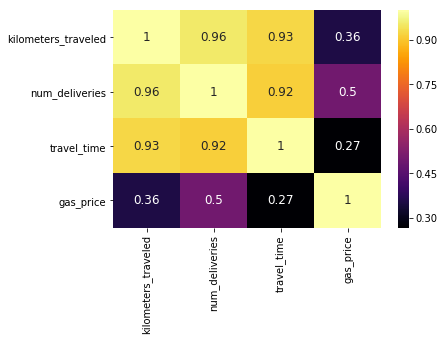

In [7]:
sns.heatmap(corr,
            annot=True,
            cbar=True,
            annot_kws={"size": 12},
            cmap="inferno"
           )

#### The features that have the highest correlation with travel time are miles traveled and number of deliveries.

### Interpretation of correlations

In [8]:
X = df[["kilometers_traveled", 'num_deliveries']]
Y = df.travel_time

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [10]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((7, 2), (3, 2), (7,), (3,))

In [11]:
X_train_constant = sm.add_constant(X_train)
X_test_constant = sm.add_constant(X_test)

#### Find lowest VIF

In [12]:
km_dev = X_train[["kilometers_traveled", "num_deliveries"]].columns
vifs2 = []
for i in range(0, len(km_dev)):
    x = list(km_dev)
    y = x.pop(i)
    m = sm.OLS(X_train[y], sm.add_constant(X_train_constant[x]))
    result = m.fit()
    vif = 1 / (1 - result.rsquared)
    vifs2.append((y, vif))
vifs2

[('kilometers_traveled', 19.788805259324253),
 ('num_deliveries', 19.788805259324295)]

In [13]:
print(f" Feature {min(vifs2)} will be used.")

 Feature ('kilometers_traveled', 19.788805259324253) will be used.


#### Run model with lowest VIF.

In [14]:
X2 = df.kilometers_traveled.values.reshape(-1, 1)

In [15]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y, random_state=0)

In [16]:
X_train_constant2 = sm.add_constant(X_train2)
X_test_constant2 = sm.add_constant(X_test2)
model2 = sm.OLS(Y_train2, X_train_constant2).fit()
model2.summary()

/Users/Dominance/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            travel_time   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     17.13
Date:                Sat, 03 Aug 2019   Prob (F-statistic):            0.00901
Time:                        19:17:23   Log-Likelihood:                -2.1341
No. Observations:                   7   AIC:                             8.268
Df Residuals:                       5   BIC:                             8.160
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0568      0.835      3.662      0.015       0.911       5.202
x1             0.0421      0.010      4.138      0.009       0.016       0.068
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.060
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.378
Skew:                           0.264   Prob(JB):                        0.828
Kurtosis:                       1.990   Cond. No.                         466.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
print(f"For every kilometer increase the time travel is increases by {model2.params[1]:.3f} hours.")

For every kilometer increase the time travel is increases by 0.042 hours.


In [18]:
print(f"{(model2.rsquared)*100:.2f}% of the variation in travel time can be explained by kilometers traveled.")

77.40% of the variation in travel time can be explained by kilometers traveled.


### Predict

In [19]:
intercept = model2.params[0]
slope = model2.params[1]
intercept, slope

(3.0568119356105257, 0.042127993718099735)

In [20]:
def manual_prediction(km):
    "return hours of travel time given kilometers"
    for i in range(len(km)):
        print(f"{km[i]} km = {intercept + slope * km[i]:.2f} hours of travel time.")

In [21]:
manual_prediction([78, 44])

78 km = 6.34 hours of travel time.
44 km = 4.91 hours of travel time.


In [22]:
y_pred = model2.predict(X_test_constant2)
y_pred

array([6.34279545, 7.64876325, 4.91044366])

#### Model prediction

In [23]:
y_pred_df = pd.DataFrame(y_pred, columns=["predicted_time_travel"])
y_pred_df["kilometers_traveled"] = X_test2
y_pred_df

,predicted_time_travel,kilometers_traveled
0,6.342795,78
1,7.648763,109
2,4.910444,44


#### Calculate Confidence Interval

In [27]:
t_stat = stats.t(5).isf(0.05 / 2)
t_stat

2.57058183661474

In [28]:
def conf_interval(tstat, data):
    ans = []
    "calc confidence interval for predicted values"
    sq_err = np.sqrt(model2.mse_resid)
    for d in data:        
        ans.append((round(d - tstat * sq_err, 2), (round(d + tstat * sq_err, 2))))
    return ans
conf_interval(t_stat, y_pred_df.predicted_time_travel.values)        

[(5.34, 7.34), (6.65, 8.65), (3.91, 5.91)]

In [29]:
y_pred_df["conf_interval"] = conf_interval(t_stat, y_pred_df.predicted_time_travel.values)   
y_pred_df = y_pred_df[["kilometers_traveled", "predicted_time_travel", "conf_interval"]]
y_pred_df

,kilometers_traveled,predicted_time_travel,conf_interval
0,78,6.342795,"(5.34, 7.34)"
1,109,7.648763,"(6.65, 8.65)"
2,44,4.910444,"(3.91, 5.91)"
